#### 栅格数据可视化

In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path_data = 'data/section-6/s2_20m_6bands_chenggong.tif'


In [3]:
rsimg = rio.open(path_data)
img_array = rsimg.read()
img_array.shape


(6, 1611, 1497)

In [4]:
region = rsimg.bounds
region


BoundingBox(left=268180.0, bottom=2733220.0, right=298120.0, top=2765440.0)

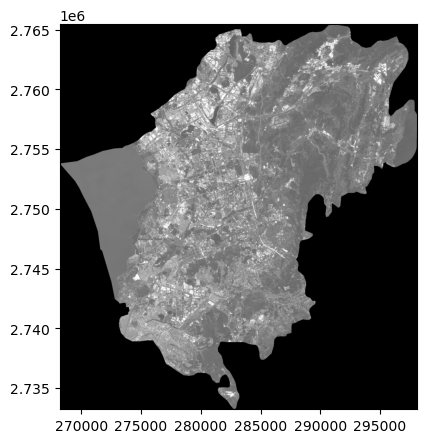

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
band1 = img_array[0]
ax.imshow(band1, cmap='grey', vmin=0, vmax=3000)  ## cmap='plasma'
## 设置坐标轴范围
region = [region[0],region[2],region[1],region[3]]    ### plt.imshow()中extent: [left, right, bottom, up]
ax.imshow(band1, cmap='grey', extent=region, vmin=0, vmax=3000)


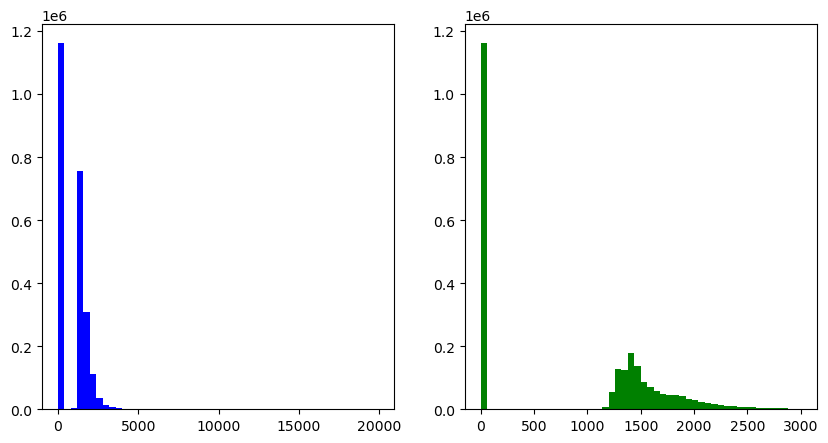

In [12]:
## 直方图统计
band1_values = img_array[0].flatten()
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(band1_values, bins=50, facecolor='blue');
ax[1].hist(band1_values, bins=50, range=[0,3000], facecolor='green');


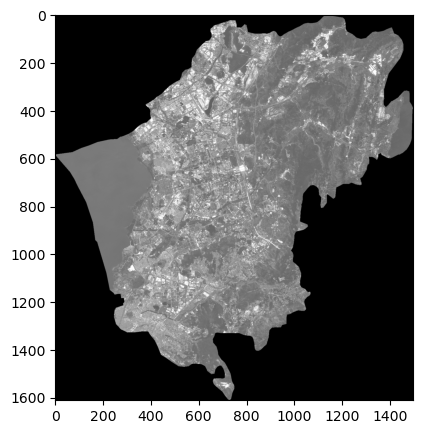

In [13]:
## 直方图拉伸
fig, ax = plt.subplots(1,1, figsize=(5,5))
band1_ = band1.copy()
band1_[band1_<0]=0; band1_[band1_>3000]=3000; 
band1_ = band1_/(3000-0)   ### 归一化
ax.imshow(band1_, cmap='grey')   ### 直方图拉伸
# ax.imshow(band1, cmap='grey', vmax=3000, vmin=0)   ### 直方图拉伸,单波段显示有效


彩色显示

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.3333333333333335].


(3, 1611, 1497)


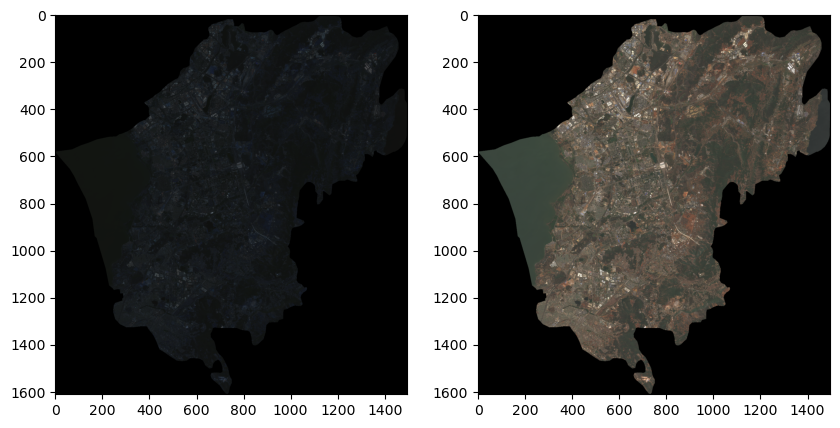

In [22]:
## 彩色显示
bands_img = img_array[0:3]
print(bands_img.shape)
fig, ax = plt.subplots(1,2, figsize=(10,5))
bands_img = bands_img.transpose(1,2,0)
bands_img.shape
bands_img_nor = bands_img/(bands_img.max()-bands_img.min())
ax[0].imshow(bands_img_nor)   ## 显示rgb时像元值范围应为0-1，或0-255
## Note 1: rgb显示时，vmax, vmin失效  
# ax[1].imshow(bands_img_nor, vmax=0.5, vmin=0)   ## 根据以下直方图拉伸结果  
bands_img_nor_ = bands_img_nor.copy()
# bands_img_nor_[bands_img_nor_<0]=0; bands_img_nor_[bands_img_nor_>0.5]=0.5;
# ax[1].imshow(bands_img_nor_)              ## 根据以下直方图拉伸结果
bands_img_nor_ = bands_img_nor_/(0.5-0.2)     ## 将像元值拉伸到0-1（即归一化）
# ax[1].imshow(bands_img_nor_)              ## 根据以下直方图拉伸结果
bands_img_nor_rgb = bands_img_nor_.copy()
bands_img_nor_rgb[:,:,0], bands_img_nor_rgb[:,:,2] = \
                    bands_img_nor_[:,:,2], bands_img_nor_[:,:,0]  ## bgr->rgb
ax[1].imshow(bands_img_nor_rgb)   ## 真彩色显示
